In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
inspector = inspect(engine)

In [ ]:
tables = inspector.get_table_names()

for t in tables:
    print(t)
    for column in inspector.get_columns(t):
        print(column["name"], column["type"])
        print()

measurement
id INTEGER

station TEXT

date TEXT

prcp FLOAT

tobs FLOAT

station
id INTEGER

station TEXT

name TEXT

latitude FLOAT

longitude FLOAT

elevation FLOAT



In [10]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# Save references to each table
measurement = Base.classes.measurement
measurement

station = Base.classes.station
station

sqlalchemy.ext.automap.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
precipitation_data = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [15]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

                                               

2016-08-23


In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_data = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > one_year_ago).order_by(measurement.date).all()

# Perform a query to retrieve the date and precipitation scores
prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [ ]:
# set the index to date
prcp_data_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


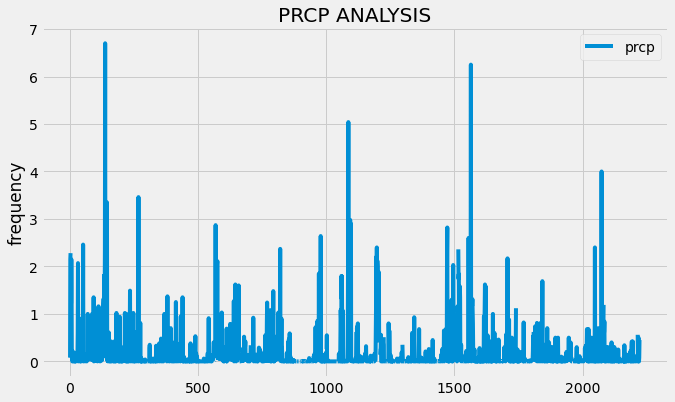

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_data_df.plot(figsize=(10, 6))
ax.set_title("PRCP ANALYSIS")
ax.set_ylabel('frequency')
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement).group_by(measurement.station).count()
print("There are {} stations available.".format(stations))

There are 9 stations available.


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, measurement.date).all()
active_stations_df = pd.DataFrame(active_stations, columns=['station','frequency'])

In [ ]:
#Design a query that correctly finds the number of stations in the dataset
active_stations_df = active_stations_df.groupby(['station']).count().sort_values\
('frequency', ascending=False)
active_stations_df

,frequency
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [ ]:
most_active_station = active_stations_df.index[0]

most_active_station_df = pd.DataFrame(session.query(station.station, station.name)\
                                      .filter(station.station == most_active_station).all(), columns=["station", "name"])
name_of_most_active_station = most_active_station_df.loc[0, "name"] 
name_of_most_active_station
                                      
                                      
                                                                                          

'WAIHEE 837.5, HI US'

In [ ]:
# Design a query that correctly finds the min, max, 
# and average temperatures for the most active station (USC00519281)
temp = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
session.query(*temp).filter(measurement.station==most_active_station).all()           

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
temp_obs = session.query(measurement.tobs).\
                                filter(measurement.station==most_active_station).\
                                filter(measurement.date >= one_year_ago).\
                                order_by(measurement.date.desc()).all()
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


In [ ]:
temp_results = session.query(measurement.station, measurement.tobs).\
filter(measurement.station == most_active_station)

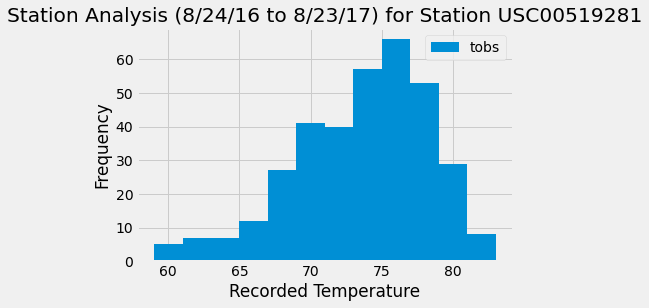

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + most_active_station)
plt.legend(["tobs"])
plt.show()

# Close session

In [ ]:
# Close Session
session.close()